In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('data.csv')

data.drop(['id','Unnamed: 32'],axis=1)

data.diagnosis=[1 if each =="M" else 0 for each in data.diagnosis]
data.drop(['id','Unnamed: 32'],axis=1)
y=data.diagnosis.values
data.drop(['id','Unnamed: 32'],axis=1)
x_data=data.drop(['diagnosis','Unnamed: 32'],axis=1)
print(x)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values


           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    0.000915     0.521037      0.022658        0.545989   0.363733   
1    0.000915     0.643144      0.272574        0.615783   0.501591   
2    0.092495     0.601496      0.390260        0.595743   0.449417   
3    0.092547     0.210090      0.360839        0.233501   0.102906   
4    0.092559     0.629893      0.156578        0.630986   0.489290   
..        ...          ...           ...             ...        ...   
564  0.001007     0.690000      0.428813        0.678668   0.566490   
565  0.001007     0.622320      0.626987        0.604036   0.474019   
566  0.001008     0.455251      0.621238        0.445788   0.303118   
567  0.001008     0.644564      0.663510        0.665538   0.475716   
568  0.000092     0.036869      0.501522        0.028540   0.015907   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.593753          0.792037        0.703140             0

In [150]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

print(x_train)
print("y_train",y_train)
print("x_test",x_test)
print('ytest',y_test)

def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    z=np.dot(w.T,x_train)+b
    print()
    y_head=sigmoid(z)
    loss=-((y_train*np.log(y_head))-((1-y_train)*np.log(1-y_head)))
    cost=(np.sum(loss))/x_train.shape[1]
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    return cost,gradients


                              9         468       382       322       84   \
id                       0.092715  0.009991  0.000090  0.000972  0.009441   
radius_mean              0.259312  0.502579  0.239907  0.278243  0.237541   
texture_mean             0.484613  0.460602  0.439973  0.122083  0.200879   
perimeter_mean           0.277659  0.519729  0.241587  0.269712  0.229148   
area_mean                0.140997  0.355037  0.129077  0.153256  0.127169   
smoothness_mean          0.595558  0.363456  0.150943  0.548614  0.402636   
compactness_mean         0.675480  0.555242  0.269677  0.211521  0.160328   
concavity_mean           0.532568  0.500469  0.186106  0.089035  0.097259   
concave points_mean      0.424602  0.498012  0.148012  0.168986  0.092594   
symmetry_mean            0.489899  0.321212  0.072222  0.243939  0.514646   
fractal_dimension_mean   0.683867  0.499789  0.350253  0.311710  0.204718   
radius_se                0.067391  0.295999  0.002861  0.039725  0.041861   

In [151]:
def update (w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    
    
    for i in range(number_of_iteration):
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        if i % 10 ==0:
            cost_list2.append(cost)
            index.append(i)
            print('cost after iteration %i : %f' %(i,cost))
            
            
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("number of iterarion")
    plt.ylabel("cost")
    plt.show()
            
    return parameters,gradients,cost_list
            
        

In [152]:
def predict(w,b,x_test):
    z=sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction=np.zeros((1,x_test.shape[1]))
    
    for i in range (z.shape[1]):
        if z[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
            
    return Y_prediction



In [153]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[0]
    w,b=initialize_weights_and_bias(dimension)
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    y_prediction_test=predict(parameters['weight'],parameters["bias"],x_test)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)
    
    print("train accuracy:{}%".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy:{}%".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    
    
    
    


cost after iteration 0 : -0.212255










cost after iteration 10 : -0.071870










cost after iteration 20 : -0.048883










cost after iteration 30 : -0.035918










cost after iteration 40 : -0.027637










cost after iteration 50 : -0.021868










cost after iteration 60 : -0.017604










cost after iteration 70 : -0.014314










cost after iteration 80 : -0.011695










cost after iteration 90 : -0.009557










cost after iteration 100 : -0.007779










cost after iteration 110 : -0.006275










cost after iteration 120 : -0.004986










cost after iteration 130 : -0.003870










cost after iteration 140 : -0.002892










cost after iteration 150 : -0.002030










cost after iteration 160 : -0.001264










cost after iteration 170 : -0.000577










cost after iteration 180 : 0.000040










cost after iteration 190 : 0.000600










cost after iteration 200 : 0.001108










cost after iteration 210 :

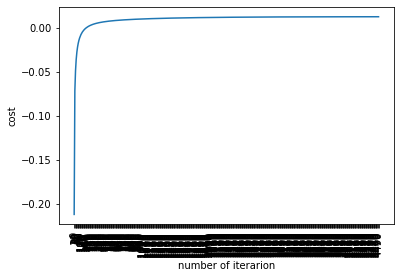

train accuracy:98.34368530020704%
test accuracy:97.67441860465117%


In [159]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=4500)
    